<a href="https://colab.research.google.com/github/mvs22/Comunicacoes_moveis/blob/main/projeto_comunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("LocTreino_Equipe_1.csv")

In [ ]:
len(df)

1500

In [ ]:
df.head()

,pontoId,lat,lon,pathBTS1,pathBTS2,pathBTS3,pathBTS4,pathBTS5,pathBTS6,taBTS1,taBTS2,taBTS3,taBTS4,taBTS5,taBTS6
0,2025,-8.068464,-34.897129,106.790000,122.190,114.056667,123.456667,130.123333,111.190000,0.0,1,2,1,1,0.0
1,1073,-8.071859,-34.897263,104.056667,114.790,122.523333,104.023333,129.923333,114.323333,1.0,0,2,0,1,1.0
2,889,-8.072604,-34.896393,104.790000,114.990,114.256667,107.556667,126.190000,135.790000,1.0,0,2,0,1,1.0
3,1619,-8.069527,-34.889515,121.815000,135.215,132.565000,115.340000,100.790000,135.140000,0.0,1,3,1,0,1.0
4,2932,-8.060418,-34.905537,134.640000,120.090,129.190000,128.440000,137.040000,129.290000,3.0,3,3,3,3,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pontoId   1500 non-null   int64  
 1   lat       1500 non-null   float64
 2   lon       1500 non-null   float64
 3   pathBTS1  1500 non-null   float64
 4   pathBTS2  1500 non-null   float64
 5   pathBTS3  1500 non-null   float64
 6   pathBTS4  1500 non-null   float64
 7   pathBTS5  1500 non-null   float64
 8   pathBTS6  1499 non-null   float64
 9   taBTS1    1499 non-null   float64
 10  taBTS2    1500 non-null   int64  
 11  taBTS3    1500 non-null   int64  
 12  taBTS4    1500 non-null   int64  
 13  taBTS5    1500 non-null   int64  
 14  taBTS6    1498 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 175.9 KB


segundo o professor, time advance deveria ser um inteiro entre 0 e 63 (representa passos de 550 metros).... então vamos fazer um cast de float para inteiro

In [ ]:
df = df.dropna()

In [ ]:
df.taBTS1 = df.taBTS1.astype('int64')
df.taBTS6 = df.taBTS6.astype('int64')
df["pathBTS1"] = df["pathBTS1"].astype(float)
df["pathBTS2"] = df["pathBTS2"].astype(float)
df["pathBTS3"] = df["pathBTS3"].astype(float)
df["pathBTS4"] = df["pathBTS4"].astype(float)
df["pathBTS5"] = df["pathBTS5"].astype(float)
df["pathBTS6"] = df["pathBTS6"].astype(float)

In [ ]:
df.describe(include="all")

,pontoId,lat,lon,pathBTS1,pathBTS2,pathBTS3,pathBTS4,pathBTS5,pathBTS6,taBTS1,taBTS2,taBTS3,taBTS4,taBTS5,taBTS6
count,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000
mean,1439.524733,-8.070247,-34.895093,116.413469,118.708401,123.592616,115.980256,122.051927,126.663599,0.760695,0.985963,2.457219,0.985963,1.140374,1.123663
std,851.146153,0.004239,0.004318,12.123122,12.534384,9.183161,12.338160,12.475839,27.802419,1.448867,0.818966,0.966067,0.818966,0.838266,1.120834
min,1.000000,-8.077576,-34.906830,85.690000,76.423333,88.790000,84.056667,80.123333,87.523333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,699.750000,-8.073529,-34.898252,106.590000,111.381667,118.935833,107.056667,114.315000,115.835833,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000
50%,1392.500000,-8.070139,-34.895741,117.556667,119.523333,124.190000,116.606667,123.512561,128.656667,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,2172.250000,-8.067198,-34.891866,124.723333,128.565000,129.752500,125.798333,131.002500,136.056667,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000
max,2955.000000,-8.059339,-34.885078,144.290000,144.890000,145.890000,145.423333,146.890000,779.603100,33.000000,4.000000,5.000000,4.000000,3.000000,25.000000


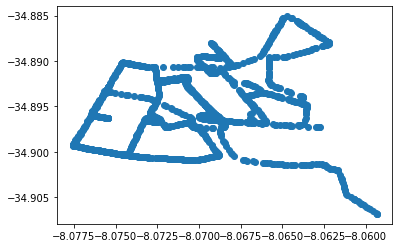

In [ ]:
plt.scatter(df.lat, df.lon)

achei meio exotico o canto inferior direito(parece que é dentro da agua, mas fui verificar no google maps e não consegui tirar nenhuma conclusão, por isso acho que as latitudes e longitudes parecem ok

### verificando os time advance:

{'boxes': [<matplotlib.lines.Line2D at 0x7f615ed85bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f615ebf9b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f615ebee0d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f615ebff690>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f615ebf9110>,
  <matplotlib.lines.Line2D at 0x7f615eb5b250>]}

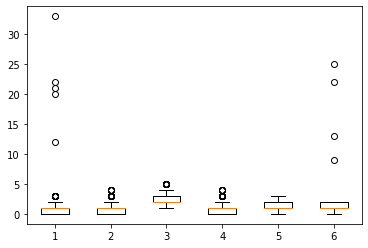

In [ ]:
fig1, ax1 = plt.subplots()
data = [df.taBTS1,df.taBTS2,df.taBTS3,df.taBTS4,df.taBTS5,df.taBTS6]
ax1.boxplot(data)

### verificando as perdas em espaço livre:

#

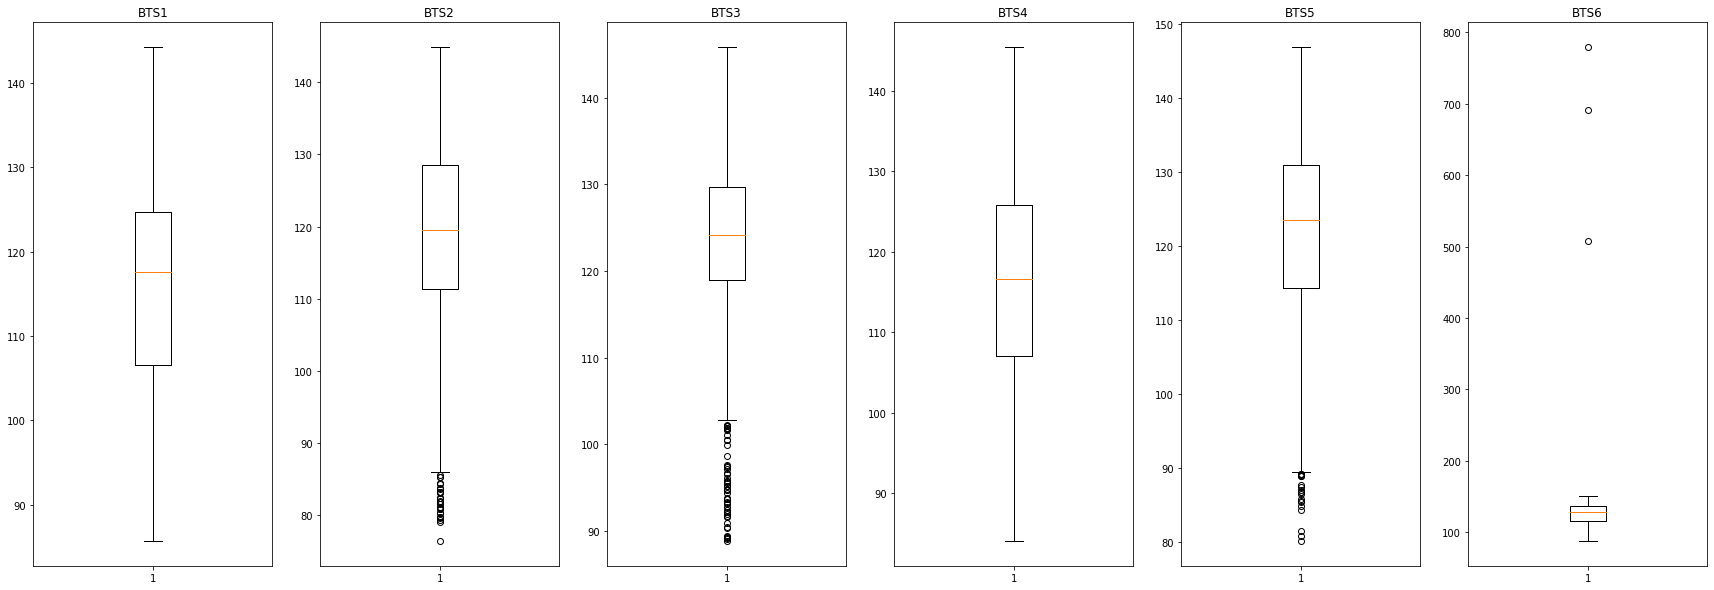

In [ ]:
fig, axs = plt.subplots(1, 6,figsize=(30,10))
for i, ax in enumerate(axs):
  ax.set_title(f'BTS{i+1}')
  ax.boxplot(df[f'pathBTS{i+1}'])

As antenas 1,4 e 6 parecem mais confiaveis pela menor presença de outliers...

# fingerprint

In [ ]:
import math

def vector_subtract(v,w):
  return [v_i - w_i for v_i, w_i in zip(v,w)]

def dot(v,w):
  return sum(v_i * w_i for v_i, w_i in zip(v,w))

def sum_of_squares(v):
  return dot(v,v)

def magnitude(v):
  return math.sqrt(sum_of_squares(v))

def distance(v,w):
  return magnitude(vector_subtract(v,w))

In [ ]:
# recebe um vetor [pathBTS1,	pathBTS2,	pathBTS3,	pathBTS4,	pathBTS5,	pathBTS6]
# e o df com as colunas [lat,	lon,	pathBTS1,	pathBTS2,	pathBTS3,	pathBTS4,	pathBTS5,	pathBTS6]
def fingerprint(v,df):
  df2 = df[['pathBTS1',	'pathBTS2',	'pathBTS3',	'pathBTS4',	'pathBTS5',	'pathBTS6']]
  #print(df2.head())
  
  df['distance'] = [distance(list(w),v) for w in df.values.tolist()]
  df.sort_values(by='distance',ascending=True)
  return df.loc[0, ['lat','lon']]

In [ ]:
v = [106,	122,	114,	123,	130,	111]
fingerprint(v,df)

lat    -8.068464
lon   -34.897129
Name: 0, dtype: float64

# Treinando um regressor usando sklearn

## dividindo em train test split

In [ ]:
df.sample(frac=1)
x_train = df.loc[:len(df)*0.8,['pathBTS1',	'pathBTS2',	'pathBTS3',	'pathBTS4',	'pathBTS5',	'pathBTS6']]
Y_train = df.loc[:len(df)*0.8,['lat','lon']]
x_test = df.loc[len(df)*0.8:,['pathBTS1',	'pathBTS2',	'pathBTS3',	'pathBTS4',	'pathBTS5',	'pathBTS6']]
Y_test = df.loc[len(df)*0.8:,['lat','lon']]

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model.fit(x_train,Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(x_test)

In [ ]:
model.score(x_test, Y_test)

0.4492156981326766

## KneighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()


In [ ]:
model.fit(x_train,Y_train)

KNeighborsRegressor()

In [ ]:
Y_pred = model.predict(x_test)

In [ ]:
model.score(x_test, Y_test)

0.9469968392812563

## DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
model = DecisionTreeRegressor()


In [ ]:
model.fit(x_train,Y_train)

DecisionTreeRegressor()

In [ ]:
Y_pred = model.predict(x_test)

In [ ]:
model.score(x_test, Y_test)

0.6196285164455926

SUBMIT

In [ ]:
df = pd.read_csv("submit.csv")

In [ ]:
df.head()

,pontoId,lat,lon
0,1365,-8.51,-34.51
1,2381,-8.51,-34.51
2,2644,-8.51,-34.51
3,2224,-8.51,-34.51
4,2568,-8.51,-34.51


In [ ]:
df.describe(include="all")

,pontoId,lat,lon
count,200.000000,2.000000e+02,2.000000e+02
mean,1415.625000,-8.510000e+00,-3.451000e+01
std,884.330064,7.123258e-15,1.495884e-13
min,17.000000,-8.510000e+00,-3.451000e+01
25%,624.750000,-8.510000e+00,-3.451000e+01
50%,1381.000000,-8.510000e+00,-3.451000e+01
75%,2215.250000,-8.510000e+00,-3.451000e+01
max,2954.000000,-8.510000e+00,-3.451000e+01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pontoId  200 non-null    int64  
 1   lat      200 non-null    float64
 2   lon      200 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


DADOS BTS

In [ ]:
df = pd.read_csv("Dados_BTSs.csv")

In [ ]:
df

,name,lat,lon,band,bcch,eirp,bts
0,136_2,-8.068361,-34.892722,GSM1800,662,55.59,BTS-1
1,137_3,-8.075917,-34.894611,GSM1800,806,55.59,BTS-2
2,197_1,-8.076361,-34.908000,GSM1800,666,55.59,BTS-3
3,137_1,-8.075917,-34.894611,GSM1800,690,55.59,BTS-4
4,138_2,-8.066000,-34.889444,GSM1800,673,55.59,BTS-5
5,245_2,-8.064583,-34.894583,GSM1800,682,55.59,BTS-6


In [ ]:
df.describe(include="all")

,name,lat,lon,band,bcch,eirp,bts
count,6,6.000000,6.000000,6,6.000000,6.000000e+00,6
unique,6,NaN,NaN,1,NaN,NaN,6
top,136_2,NaN,NaN,GSM1800,NaN,NaN,BTS-1
freq,1,NaN,NaN,6,NaN,NaN,1
mean,NaN,-8.071190,-34.895662,NaN,696.500000,5.559000e+01,NaN
std,NaN,0.005477,0.006370,NaN,54.617763,7.783606e-15,NaN
min,NaN,-8.076361,-34.908000,NaN,662.000000,5.559000e+01,NaN
25%,NaN,-8.075917,-34.894611,NaN,667.750000,5.559000e+01,NaN
50%,NaN,-8.072139,-34.894597,NaN,677.500000,5.559000e+01,NaN
75%,NaN,-8.066590,-34.893187,NaN,688.000000,5.559000e+01,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    6 non-null      object 
 1   lat     6 non-null      float64
 2   lon     6 non-null      float64
 3   band    6 non-null      object 
 4   bcch    6 non-null      int64  
 5   eirp    6 non-null      float64
 6   bts     6 non-null      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 464.0+ bytes
